# **Solution of Week 3 - Project 1**

In [228]:
!python --version

Python 3.9.7


<hr>

### **0. Loading Packages and Dataset:**

In [229]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder

In [230]:
import os
# Replace the path with the path of the folder where you have saved the data files
os.chdir(r'C:\Users\soura\Courses\GrrowUp Data Analytics\3. Week 3 -  Data Cleaning\Week 3 -Project 1')

In [231]:
dataset = pd.read_csv('dataset.csv')

In [232]:
dataset.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1


<hr>

### **1. Missing Values:**

In [233]:
dataset.isna().sum()

Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64

- As we can see there are a few missing values namely:
  - **7** records in Age column
  - **1** record in Rating column

- **To handle missing values we can take the average of the other records and fill the missing columns of the records as follows:**

In [234]:
avgAge = round(dataset['Age'].mean(),2)

avgRating = round(dataset['Rating'].mean(),2)

In [235]:
dataset['Age'].fillna(avgAge, inplace = True)
dataset['Rating'].fillna(avgRating, inplace = True)

In [236]:
dataset.isnull().sum()

Index          0
Age            0
Salary         0
Rating         0
Location       0
Established    0
Easy Apply     0
dtype: int64

In [237]:
dataset.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.00,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.00,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,39.05,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.00,$44k-$99k,4.4,India In,1988,-1
4,4,25.00,$44k-$99k,6.4,Australia Aus,2002,-1


- Now we have replaced all missing values in the dataset with thier average value.

<hr>

### **2. Data Types:**

In [238]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        29 non-null     int64  
 1   Age          29 non-null     float64
 2   Salary       29 non-null     object 
 3   Rating       29 non-null     float64
 4   Location     29 non-null     object 
 5   Established  29 non-null     int64  
 6   Easy Apply   29 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ KB


- As we can seem some columns have mismatched datatypes
  - Salary Column is of **Object** datatype where it should be **float64**.
  - Easy Apply Column is of **Object** datatype where it should be **bool**.
- To fix such discrepancies we have to clean the dataset and a make sure the datatypes correspond with each column

<hr>

### **3. Outliers:**

- To find out outliers in the dataset, we'll be using box plots to visualize.

In [239]:
import matplotlib.pyplot as plt

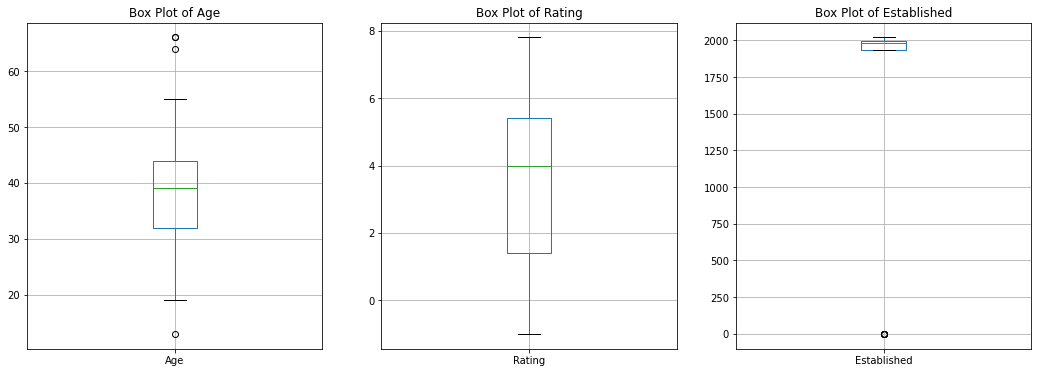

In [240]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

dataset.boxplot(column=['Age'], ax=ax[0])
ax[0].set_title('Box Plot of Age')

dataset.boxplot(column=['Rating'], ax=ax[1])
ax[1].set_title('Box Plot of Rating')

dataset.boxplot(column=['Established'], ax=ax[2])
ax[2].set_title('Box Plot of Established')

plt.show()

- As Seen from the above box plots, there seem to be some outliers in the data, these can be adjusted after further cleaning the data
  - Further, we cannot check for outliers in the Salary Column as it is in Object Dtype, so we have to manipulate the data further to compute outliers

<hr>

### **4. Salary Formatting:**

In [241]:
dataset['Salary']

0      $44k-$99k
1      $55k-$66k
2      $77k-$89k
3      $44k-$99k
4      $44k-$99k
5      $77k-$89k
6      $44k-$99k
7      $44k-$99k
8      $44k-$99k
9      $44k-$99k
10     $10k-$49k
11     $10k-$49k
12     $44k-$99k
13     $44k-$99k
14     $44k-$99k
15    $88k-$101k
16     $19k-$40k
17     $44k-$99k
18     $44k-$99k
19     $44k-$99k
20     $44k-$99k
21     $44k-$99k
22     $55k-$66k
23     $44k-$99k
24     $44k-$99k
25     $44k-$99k
26     $55k-$66k
27     $44k-$99k
28     $39k-$88k
Name: Salary, dtype: object

- As we can see from the Salary column, the data is in a range from $xx to $yy, which is not suitable for us to compute it properly
  
- We can format and standardize the data by splitting the Salary Column into Two different columns being - **Mininum Salary** & **Maximum Salary**
- Or we could convert the Salary Column into a **Median Salary** Column, which is the apporach we'll be using.

We define a function to extract median salary

In [242]:
def extract_median_salary(salary_range):
    salary_parts = salary_range.strip('$').replace('k', '').split('-')
    salary_values = [int(part) for part in salary_parts if part.isdigit()]
    return (sum(salary_values) / 2)*1000

And then we apply it to the dataset

In [243]:
dataset['Salary'] = dataset['Salary'].apply(extract_median_salary)

In [244]:
dataset.rename(columns={'Salary': 'Median Salary'}, inplace=True)

In [245]:
dataset.head()

,Index,Age,Median Salary,Rating,Location,Established,Easy Apply
0,0,44.00,22000.0,5.4,"India,In",1999,TRUE
1,1,66.00,27500.0,3.5,"New York,Ny",2002,TRUE
2,2,39.05,38500.0,-1.0,"New York,Ny",-1,-1
3,3,64.00,22000.0,4.4,India In,1988,-1
4,4,25.00,22000.0,6.4,Australia Aus,2002,-1


- Now we have a much more descriptive **Median Salary Column**

<hr>

### **5. Location Formatting:** & **10. Handling Special Characters:**

In [246]:
dataset['Location']

0          India,In
1       New York,Ny
2       New York,Ny
3          India In
4     Australia Aus
5          India,In
6       New York,Ny
7     Australia Aus
8       New York,Ny
9          India,In
10         India,In
11         India,In
12         India,In
13    Australia Aus
14    Australia Aus
15    Australia Aus
16         India,In
17      New York,Ny
18      New York,Ny
19      New York,Ny
20      New York,Ny
21      New York,Ny
22      New York,Ny
23      New York,Ny
24      New York,Ny
25    Australia Aus
26         India,In
27         India,In
28    Australia Aus
Name: Location, dtype: object

- As we can see from the Location Column, there are some inconsistencies in the formatting of the Location name

In [247]:
def standardize_location(location):
    if pd.isna(location):
        return location

    if ',' not in location:
        parts = location.split()
        if len(parts) > 1:
            location = ', '.join(parts)
    
    standardized_location = re.sub(r'\s+', ' ', location.strip()).title()
    standardized_location = re.sub(r',\s*', ', ', location)
    return standardized_location

In [248]:
dataset['Location'] = dataset['Location'].apply(standardize_location)

In [249]:
dataset.head()

,Index,Age,Median Salary,Rating,Location,Established,Easy Apply
0,0,44.00,22000.0,5.4,"India, In",1999,TRUE
1,1,66.00,27500.0,3.5,"New York, Ny",2002,TRUE
2,2,39.05,38500.0,-1.0,"New York, Ny",-1,-1
3,3,64.00,22000.0,4.4,"India, In",1988,-1
4,4,25.00,22000.0,6.4,"Australia, Aus",2002,-1


- Now we have standardized the fomatting for the Location Column

<hr>

### **6. Established Column:**

In [250]:
dataset['Established']

0     1999
1     2002
2       -1
3     1988
4     2002
5     1999
6       -1
7       -1
8       -1
9       -1
10    2008
11    2009
12    1999
13    2019
14    2020
15    1999
16    1984
17    1943
18    1954
19    1955
20    1944
21    1946
22    1988
23    1999
24    1987
25    1980
26    1934
27    1935
28    1932
Name: Established, dtype: int64

- As we can see from the Established Column, there are some anomalies in the data where some rows have established year as **"-1"**.

- To address this, we can just compute the mode of the Established columns and replace the anomalies as such

In [251]:
EstablishedMode = dataset['Established'][dataset['Established']>0].mode()

In [252]:
for each in dataset['Established']:
    if each < 0:
        dataset['Established'] = dataset['Established'].replace(each, EstablishedMode[0])

In [253]:
dataset['Established']

0     1999
1     2002
2     1999
3     1988
4     2002
5     1999
6     1999
7     1999
8     1999
9     1999
10    2008
11    2009
12    1999
13    2019
14    2020
15    1999
16    1984
17    1943
18    1954
19    1955
20    1944
21    1946
22    1988
23    1999
24    1987
25    1980
26    1934
27    1935
28    1932
Name: Established, dtype: int64

- As the data is in **YYYY** form now and we have dealt with all the anomalies, we do not need to standardize the data.

<hr>

### **7. Easy Apply Indicator:** & **12. Easy Apply Transformation:**

In [254]:
dataset['Easy Apply']

0     TRUE
1     TRUE
2       -1
3       -1
4       -1
5     TRUE
6       -1
7       -1
8       -1
9     TRUE
10    TRUE
11      -1
12      -1
13    TRUE
14    TRUE
15      -1
16      -1
17    TRUE
18    TRUE
19    TRUE
20    TRUE
21      -1
22    TRUE
23    TRUE
24      -1
25    TRUE
26    TRUE
27      -1
28      -1
Name: Easy Apply, dtype: object

- As we can see from the Easy Apply Column, there are inconsistencies in the data,
  - where the values are Either **TRUE** or **-1**
  - It makes the data difficult to compute on, thus we'll be transforming this column into boolean data as such:

In [255]:
for data in dataset['Easy Apply']:
    if data == '-1':
        dataset['Easy Apply'].replace(data, 0, inplace = True)
    elif data == 'TRUE':
        dataset['Easy Apply'].replace(data, 1, inplace = True)

dataset['Easy Apply'] = dataset['Easy Apply'].astype(bool)

In [256]:
dataset.head()

,Index,Age,Median Salary,Rating,Location,Established,Easy Apply
0,0,44.00,22000.0,5.4,"India, In",1999,True
1,1,66.00,27500.0,3.5,"New York, Ny",2002,True
2,2,39.05,38500.0,-1.0,"New York, Ny",1999,False
3,3,64.00,22000.0,4.4,"India, In",1988,False
4,4,25.00,22000.0,6.4,"Australia, Aus",2002,False


In [257]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          29 non-null     int64  
 1   Age            29 non-null     float64
 2   Median Salary  29 non-null     float64
 3   Rating         29 non-null     float64
 4   Location       29 non-null     object 
 5   Established    29 non-null     int64  
 6   Easy Apply     29 non-null     bool   
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 1.5+ KB


- Now we have the Easy Apply Column transformed to a boolean datatype with consistent entries for computation

<hr>

### **8. Rating Range:** & **15. Consistent Rating Scale:**

In [258]:
dataset['Rating']

0     5.40
1     3.50
2    -1.00
3     4.40
4     6.40
5     1.40
6     0.00
7    -1.00
8     5.40
9     7.70
10    5.40
11    6.70
12    0.00
13   -1.00
14    4.00
15    3.00
16    4.50
17    5.30
18    6.70
19    3.30
20    5.70
21    5.00
22    7.80
23    2.40
24   -1.00
25    0.00
26    3.53
27    5.40
28    3.40
Name: Rating, dtype: float64

- Looking at the rows in the Rating Column there seem to be some in consistency as well as erroneous data in it,
  - there are -1.00 values in rating
  - there is no specific range mentioned or inferred from the data
- To clean this Column we have to transform the data into a scale of 0 - 5 and then normalize the data, which would be ideal for further computation

- First we find the minimum and maximum rating in the data

In [259]:
min_rating = dataset['Rating'].min()
max_rating = dataset['Rating'].max()

- Then the normalize the rest of the data using the min and max rating

In [260]:
dataset['Rating'] = round(((dataset['Rating'] - min_rating) / (max_rating - min_rating)) * 5, 2)

In [261]:
dataset

,Index,Age,Median Salary,Rating,Location,Established,Easy Apply
0,0,44.00,22000.0,3.64,"India, In",1999,True
1,1,66.00,27500.0,2.56,"New York, Ny",2002,True
2,2,39.05,38500.0,0.00,"New York, Ny",1999,False
3,3,64.00,22000.0,3.07,"India, In",1988,False
4,4,25.00,22000.0,4.20,"Australia, Aus",2002,False
5,5,44.00,38500.0,1.36,"India, In",1999,True
6,6,21.00,22000.0,0.57,"New York, Ny",1999,False
7,7,44.00,22000.0,0.00,"Australia, Aus",1999,False
8,8,35.00,22000.0,3.64,"New York, Ny",1999,False
9,9,22.00,22000.0,4.94,"India, In",1999,True


- Now we have transformed the data into a 0 - 5 Rating Scale for easier computation

<hr>

### **9. Age Distribution:**

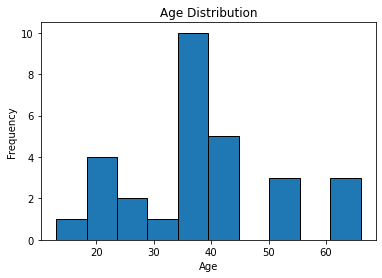

In [262]:
plt.hist(dataset['Age'].dropna(), edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [263]:
dataset['Age'].describe()

count    29.000000
mean     39.046552
std      13.973131
min      13.000000
25%      32.000000
50%      39.050000
75%      44.000000
max      66.000000
Name: Age, dtype: float64

- As we can see from the Histogram and describe function, there are some outliers that may impact analysis of our data,
  - The min value of the Age column is 13
  - the max value is 66
- These values may impact our analysis

<hr>

### **11. Data Integrity:**

In [264]:
def validate_data_integrity(dataset, current_year=2024):
    inconsistencies = []

    for index, row in dataset.iterrows():
        if row['Age'] > 0 and row['Established'] > 0:
            computed_age = current_year - row['Established']
            if computed_age != row['Age']:
                inconsistencies.append({
                    'Index': index,
                    'Age': row['Age'],
                    'Established': row['Established'],
                    'Computed Age': computed_age
                })

    return inconsistencies

In [265]:
inconsistencies = validate_data_integrity(dataset)

In [266]:
for issue in inconsistencies:
    print(f"Index {issue['Index']}: Age ({issue['Age']}) != ({issue['Established']}) -> Computed Age: {issue['Computed Age']}")

Index 0: Age (44.0) != (1999) -> Computed Age: 25
Index 1: Age (66.0) != (2002) -> Computed Age: 22
Index 2: Age (39.05) != (1999) -> Computed Age: 25
Index 3: Age (64.0) != (1988) -> Computed Age: 36
Index 4: Age (25.0) != (2002) -> Computed Age: 22
Index 5: Age (44.0) != (1999) -> Computed Age: 25
Index 6: Age (21.0) != (1999) -> Computed Age: 25
Index 7: Age (44.0) != (1999) -> Computed Age: 25
Index 8: Age (35.0) != (1999) -> Computed Age: 25
Index 9: Age (22.0) != (1999) -> Computed Age: 25
Index 10: Age (55.0) != (2008) -> Computed Age: 16
Index 11: Age (44.0) != (2009) -> Computed Age: 15
Index 12: Age (39.05) != (1999) -> Computed Age: 25
Index 13: Age (25.0) != (2019) -> Computed Age: 5
Index 14: Age (66.0) != (2020) -> Computed Age: 4
Index 15: Age (44.0) != (1999) -> Computed Age: 25
Index 16: Age (19.0) != (1984) -> Computed Age: 40
Index 17: Age (39.05) != (1943) -> Computed Age: 81
Index 18: Age (35.0) != (1954) -> Computed Age: 70
Index 19: Age (32.0) != (1955) -> Comput

- As we can see there are inconsistencies throughout the dataset, when cross referencing Age and Established Column.

<hr>

### **13. Location Accuracy:**

In [267]:
dataset.head()

,Index,Age,Median Salary,Rating,Location,Established,Easy Apply
0,0,44.00,22000.0,3.64,"India, In",1999,True
1,1,66.00,27500.0,2.56,"New York, Ny",2002,True
2,2,39.05,38500.0,0.00,"New York, Ny",1999,False
3,3,64.00,22000.0,3.07,"India, In",1988,False
4,4,25.00,22000.0,4.20,"Australia, Aus",2002,False


In [268]:
dataset['Location'].value_counts()

New York, Ny      12
India, In         10
Australia, Aus     7
Name: Location, dtype: int64

- As we can see only New York Entries are specific enough, where as India and Australia as ambiguous locations.
  - also New York entries specifiy country as NY where it should be USA.

<hr>

### **14. Handling Categorical Data:**

In [269]:
label_encoder = LabelEncoder()

dataset['Location_encoded'] = label_encoder.fit_transform(dataset['Location'])

dataset.head()

,Index,Age,Median Salary,Rating,Location,Established,Easy Apply,Location_encoded
0,0,44.00,22000.0,3.64,"India, In",1999,True,1
1,1,66.00,27500.0,2.56,"New York, Ny",2002,True,2
2,2,39.05,38500.0,0.00,"New York, Ny",1999,False,2
3,3,64.00,22000.0,3.07,"India, In",1988,False,1
4,4,25.00,22000.0,4.20,"Australia, Aus",2002,False,0


- Here we have used scikit-learn's preprocessing function **LabelEncoder()** to encode the location column into an encoded column.

<hr>

### Final Dataset after Cleanup

In [270]:
dataset

,Index,Age,Median Salary,Rating,Location,Established,Easy Apply,Location_encoded
0,0,44.00,22000.0,3.64,"India, In",1999,True,1
1,1,66.00,27500.0,2.56,"New York, Ny",2002,True,2
2,2,39.05,38500.0,0.00,"New York, Ny",1999,False,2
3,3,64.00,22000.0,3.07,"India, In",1988,False,1
4,4,25.00,22000.0,4.20,"Australia, Aus",2002,False,0
5,5,44.00,38500.0,1.36,"India, In",1999,True,1
6,6,21.00,22000.0,0.57,"New York, Ny",1999,False,2
7,7,44.00,22000.0,0.00,"Australia, Aus",1999,False,0
8,8,35.00,22000.0,3.64,"New York, Ny",1999,False,2
9,9,22.00,22000.0,4.94,"India, In",1999,True,1


# END